In [5]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
x,y = iris.data , iris.target

In [4]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
def train_and_evaluate_model(xtrain,xtest,ytrain,ytest,penalty,title):
    logreg = LogisticRegression(solver='liblinear',multi_class='ovr')
    param_grid = {'C':[0.001,0.01,0.1,1,10,100]}
    grid_search = GridSearchCV(logreg,param_grid,cv=5,scoring='accuracy')
    grid_search.fit(xtrain,ytrain)
    best_C = grid_search.best_params_['C']
    best_model = LogisticRegression(C=best_C,penalty=penalty,solver='liblinear',multi_class='ovr')
    best_model.fit(xtrain,ytrain)
    y_pred = best_model.predict(xtest)
    accuracy = accuracy_score(ytest,y_pred)
    feature_names = iris.feature_names
    plt.figure(figsize=(6,4))
    plt.bar(feature_names,np.abs(best_model.coef_[0]))
    plt.title('feature importance')
    plt.xlabel('feature')
    plt.ylabel('co efficient importance')
    plt.show()

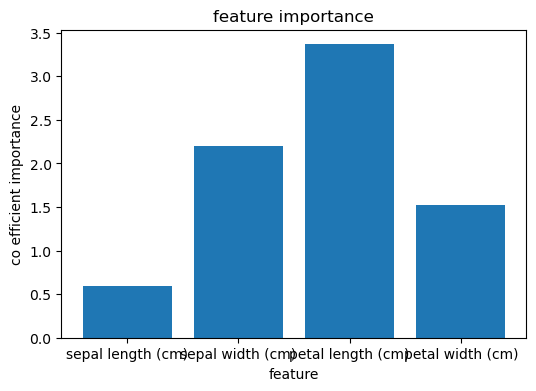

In [10]:
train_and_evaluate_model(xtrain,xtest,ytrain,ytest, penalty='l2',title='L2')